In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                          'wgt_1_.9_.85_.7_.6_.5_.4',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples',
                          'separate_g_groups/study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250_min_1e-20_max_1.899e-19_ng_4_dlogN_0.426_0.426_0.426__P_1_T_250_ng_3',
                          'wgt_1_.9_.85_.7_.6_.5_.4',
                          'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 980

nband = 120

nv = 1000

dv = 0.001

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 50.

temperature_reference_low = 250.

ighigh = 4

ngas = 6      

ng = 7

data absth(:, 1)
!     &    /2.000000e-22, 3.8470878e-22, 7.40004238e-22,
!     &     1.423430e-21, 1.10733E-20,   2.93308E-19,
!     &     2.31589E-17/

data absth(:, 2)
     &    /1.000e-20,  2.668e-20,  7.117e-20,
     &     1.899e-19,   2.633e-19,   3.652e-19,
     &     5.065e-19/

data wgt
     &     /  1.00, 0.90, 0.85,
     &     0.70, 0.60, 0.50, 0.40/

include 'trp75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

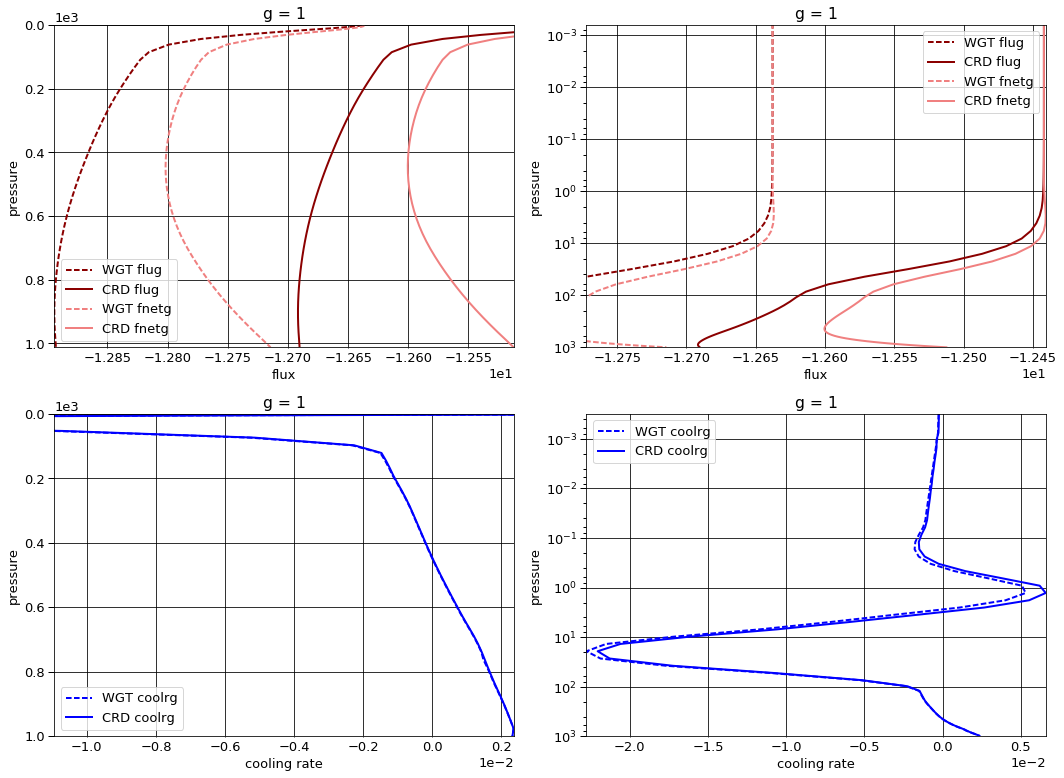

# Figure: flux, cooling rate. g-group 2

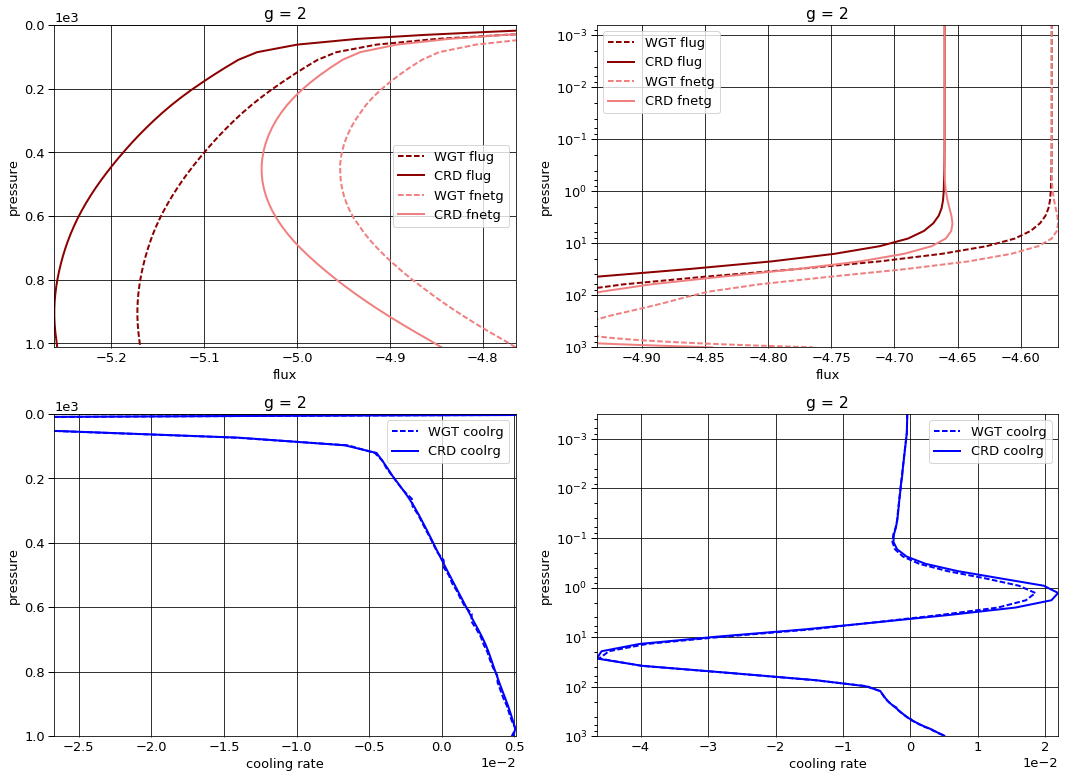

# Figure: flux, cooling rate. g-group 3

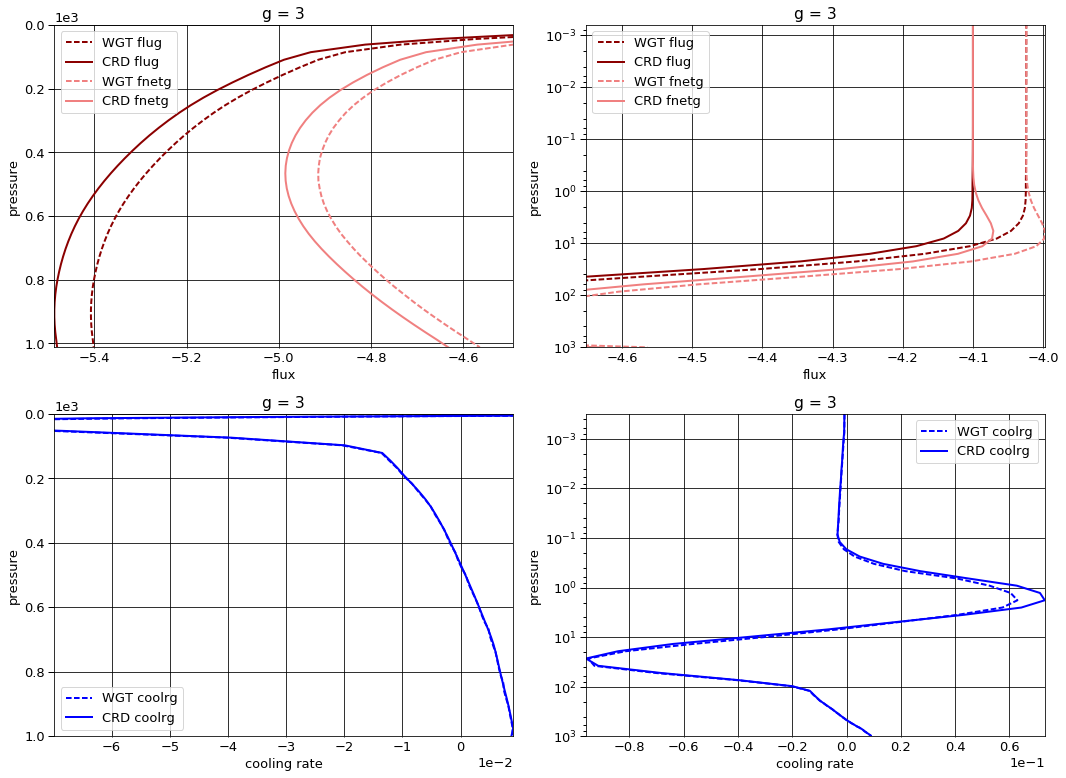

# Figure: flux, cooling rate. g-group 4

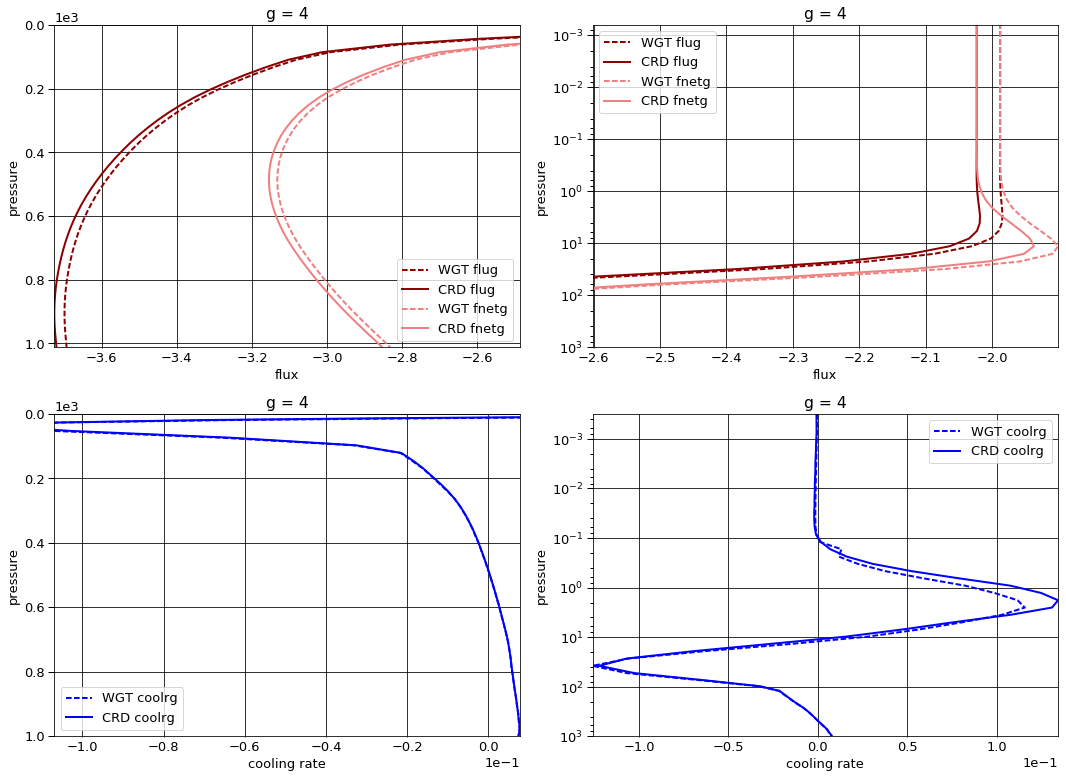

# Figure: flux, cooling rate. g-group 5

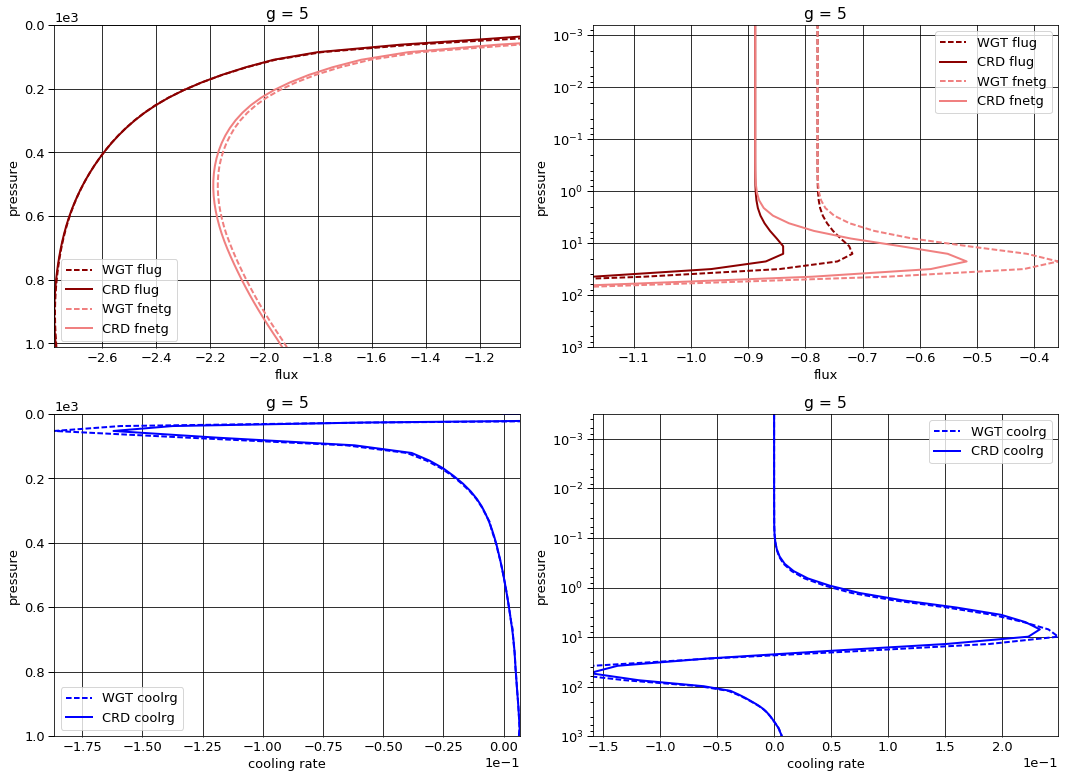

# Figure: flux, cooling rate. g-group 6

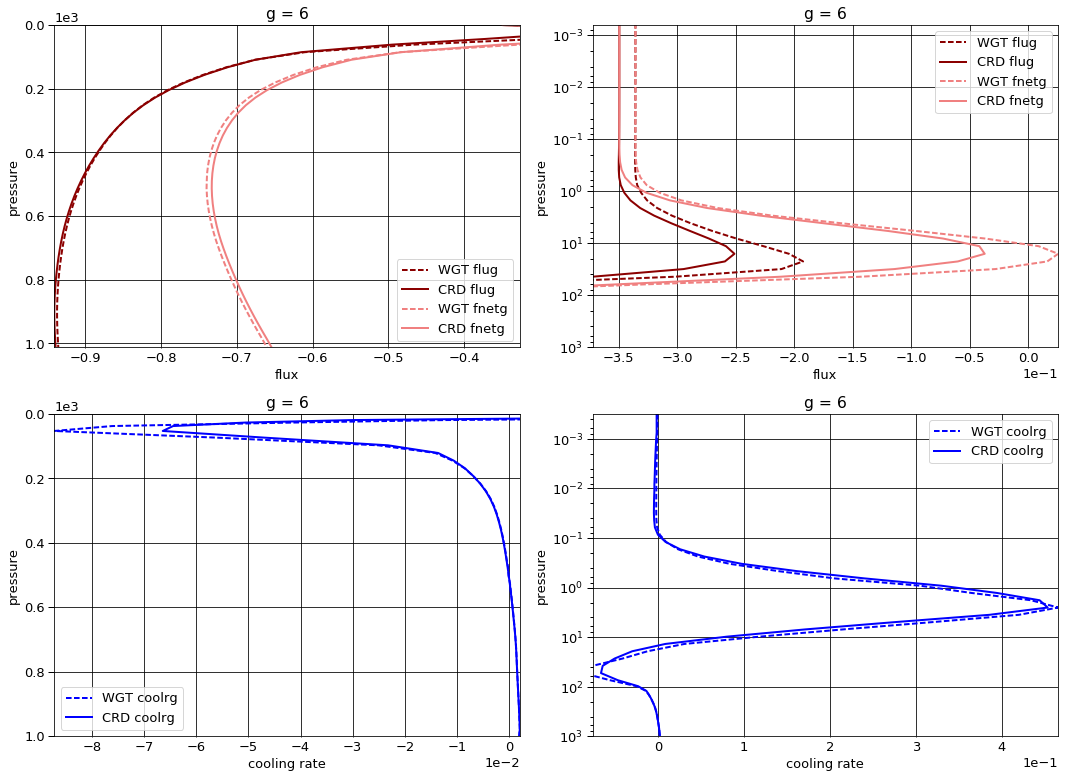

# Figure: flux, cooling rate. g-group 7

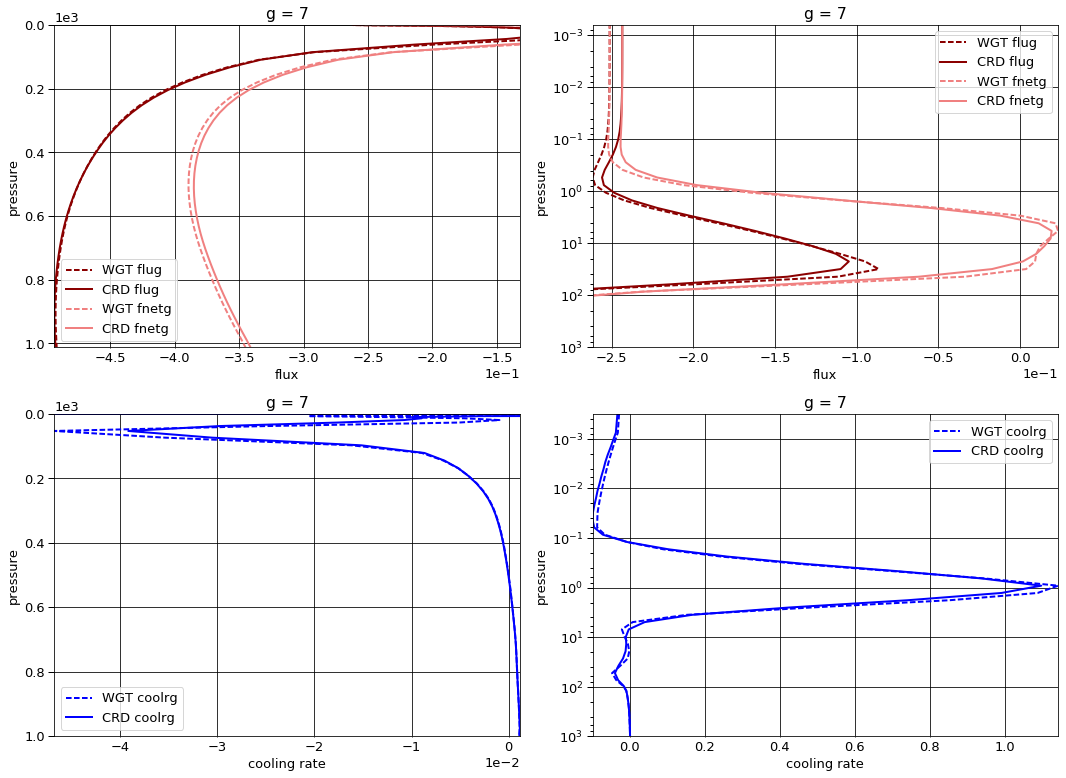

# Figure: flux, cooling rate. g-group total

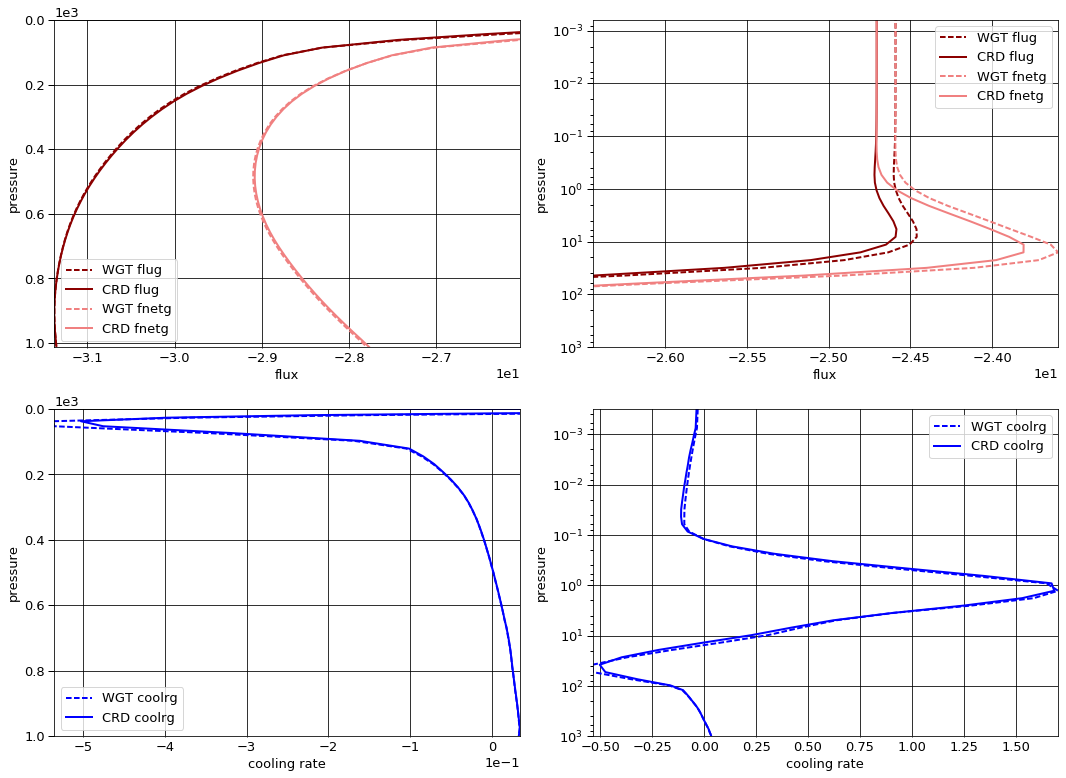

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.442065  0.000000 -12.442065
  1013.0   76    -12.690350  0.177880 -12.512470
2 0.0      1      -4.660186  0.000000  -4.660186
  1013.0   76     -5.258376  0.413997  -4.844379
3 0.0      1      -4.099960  0.000000  -4.099960
  1013.0   76     -5.480852  0.848744  -4.632109
4 0.0      1      -2.023396  0.000000  -2.023396
  1013.0   76     -3.720781  0.868259  -2.852523
5 0.0      1      -0.887673  0.000000  -0.887673
  1013.0   76     -2.772258  0.840697  -1.931561
6 0.0      1      -0.349350  0.000000  -0.349350
  1013.0   76     -0.939222  0.285081  -0.654141
7 0.0      1      -0.243527  0.000000  -0.243527
  1013.0   76     -0.492394  0.151218  -0.341176


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1     -12.637854  0.000000 -12.637854
  1013.0   76    -12.892861  0.178382 -12.714479
2 0.0      1      -4.575331  0.000000  -4.575331
  1013.0   76     -5.169007  0.404397  -4.764610
3 0.0      1      -4.023932  0.000000  -4.023932
  1013.0   76     -5.401551  0.837894  -4.563657
4 0.0      1      -1.988173  0.000000  -1.988173
  1013.0   76     -3.693790  0.862550  -2.831240
5 0.0      1      -0.778804  0.000000  -0.778804
  1013.0   76     -2.769885  0.855370  -1.914516
6 0.0      1      -0.335589  0.000000  -0.335589
  1013.0   76     -0.935663  0.275309  -0.660353
7 0.0      1      -0.251256  0.000000  -0.251256
  1013.0   76     -0.491478  0.146423  -0.345055


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.195789  0.000000 -0.195789
  1013.0   76    -0.202511  0.000502 -0.202009
2 0.0      1      0.084855  0.000000  0.084855
  1013.0   76     0.089369 -0.009601  0.079769
3 0.0      1      0.076028  0.000000  0.076028
  1013.0   76     0.079302 -0.010850  0.068452
4 0.0      1      0.035223  0.000000  0.035223
  1013.0   76     0.026991 -0.005709  0.021283
5 0.0      1      0.108868  0.000000  0.108868
  1013.0   76     0.002373  0.014672  0.017045
6 0.0      1      0.013761  0.000000  0.013761
  1013.0   76     0.003559 -0.009772 -0.006213
7 0.0      1     -0.007728  0.000000 -0.007728
  1013.0   76     0.000917 -0.004796 -0.003879

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000231
  1001.112500 75     0.002322
2 0.000312    1     -0.000473
  1001.112500 75     0.004931
3 0.000312    1     -0.000769
  1001.112500 75     0.008733
4 0.000312    1     -0.000814
  1001.112500 75     0.007419
5 0.000312    1     -0.000018
  1001.112500 75     0.006349
6 0.000312    1     -0.001680
  1001.112500 75     0.001979
7 0.000312    1     -0.032521
  1001.112500 75     0.001092


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000257
  1001.112500 75     0.002325
2 0.000312    1     -0.000479
  1001.112500 75     0.004813
3 0.000312    1     -0.000729
  1001.112500 75     0.008875
4 0.000312    1     -0.000458
  1001.112500 75     0.007403
5 0.000312    1     -0.000004
  1001.112500 75     0.006350
6 0.000312    1     -0.000704
  1001.112500 75     0.001946
7 0.000312    1     -0.028106
  1001.112500 75     0.001087


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000027
  1001.112500 75     0.000003
2 0.000312    1     -0.000006
  1001.112500 75    -0.000118
3 0.000312    1      0.000039
  1001.112500 75     0.000142
4 0.000312    1      0.000356
  1001.112500 75    -0.000016
5 0.000312    1      0.000014
  1001.112500 75     0.000001
6 0.000312    1      0.000976
  1001.112500 75    -0.000033
7 0.000312    1      0.004415
  1001.112500 75    -0.000005

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-24.706157,0.000000,-24.706157
1013.0,76,-31.354235,3.585877,-27.768358



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-24.590939,0.000000,-24.590939
1013.0,76,-31.354235,3.560324,-27.793910



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.152187e-01,0.000000,0.115219
1013.0,76,2.500000e-07,-0.025553,-0.025553


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.036506
1001.112500,75,0.032826



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.030739
1001.112500,75,0.032800



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.005767
1001.112500,75,-0.000026


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.411200,0.402707
2,0.164858,0.168826
3,0.172275,0.175651
4,0.117808,0.118860
5,0.088342,0.088307
6,0.029842,0.029957
7,0.015675,0.015692


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.000000e-20
2,2.668000e-20
3,7.117000e-20
4,1.899000e-19
5,8.076329e-20
6,1.651032e-18


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')